## Modelado de datos con Redes Neuronales (Class 10)
### Topic: Logistic regression - continuation

# Lets get a bit deeper with logistc regression
### 2D problem, decision boundary using logistic regression - two features

## What does a straight line mean?
$$y=ax+b$$
$$y=2x+10$$

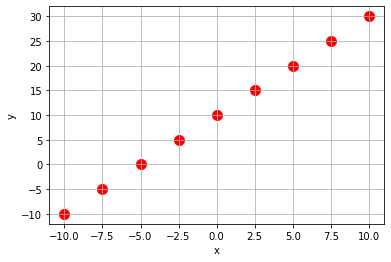

In [48]:
import numpy as np
x=np.linspace(-10,10,9)
y=2*x+10
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.scatter(x,y,c='r',s=100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

it means that all the points we generate using this equation create a straight line or in other words they satisfy relation between $x$ and $y$ such that:

$$y-ax-b=0$$

$$y-2x-10=0$$

for example this equation is satisfied (equal zero) if:
* x=5 and y=20
* x=-2.5 and y=5

because:

In [49]:
print(20-2*5-10)
print(5-2*(-2.5)-10)

0
0.0


but what if there is another point above the line:

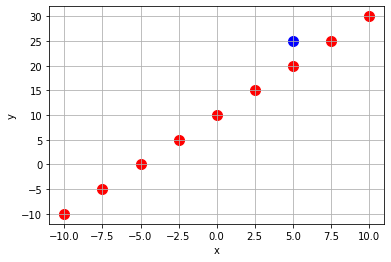

In [50]:
import numpy as np
x=np.linspace(-10,10,9)
y=2*x+10
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.scatter(x,y,c='r',s=100)
ax.scatter(5,25,c='b',s=100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

it means that if x=5 and y=25 then the equation is not satisfied, and in this case >0

In [51]:
print(25-2*5-10)

5


but what if there is another point below the line:

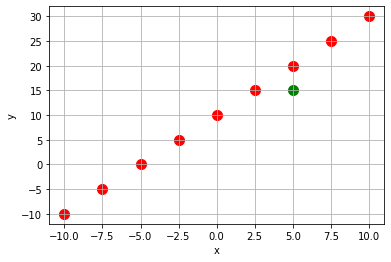

In [52]:
import numpy as np
x=np.linspace(-10,10,9)
y=2*x+10
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.scatter(x,y,c='r',s=100)
ax.scatter(5,15,c='g',s=100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

it means that if x=5 and y=15 then the equation is also not satisfied, and in this case < 0

In [53]:
print(15-2*5-10)

-5


## Now lets look at the example data points representing two unspecified features $x_1$ and $x_2$:

<img src="imgs/two_groups.png" width="400" /> 

I can try to draw a line that separates those two groups of points.

<img src="imgs/two_groups_boundary.png" width="400" /> 

Mathematically speaking:

$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$$

The above equation means that all the points lying ON the curve will satisfy the equation.  

Or making it look more like a function mentioned before $y-ax-b=0$

$$x_2 = -\theta_1/\theta_2 x_1 - \theta_0/\theta_2$$

But what about the points above and below the line?
For all other points we can get a value "z"

$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = z$$


So the positive and negative points of "z" mean that they are above and below the line.
So z can vary from $-\infty$ to $\infty$

$$g(z)=\frac{1}{1+e^{-(z)}}$$

But basically if the points is in $\infty$ means that CERTAINLY belongs to one class (above)
and if it is $-\infty$ means that CERTAINLY belongs to one class (below). And if a point lies on the curve is basically 50:50.. can belong to any class.

And exactly logistic fuction (Sigmoid) converts those values
$-\infty$ 0 $\infty$ to probabilities 0:1

$$g(\theta_0 + \theta_1 x_1 + \theta_2 x_2)=\frac{1}{1+e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2)}}$$

Depending if the points lie on the curve, below or above it we have three different cases:

* points lie above the curve ***if*** ($\theta^T X) \geq 0$ so $h_{\theta}(x) \geq 0.5$ hence points belong to one group
* points lie below the curve ***if*** ($\theta^T X) < 0$ so $h_{\theta}(x) < 0.5$ hence points belong to different group
* points lie on the curve ***if*** ($\theta^T X) = 0$ so $h_{\theta}(x) = 0.5$ 


# Tumor classification based on two features (units?)

In [58]:
X_data=bc.data
X_data=X_data[:,0:2]
y_data=bc.target

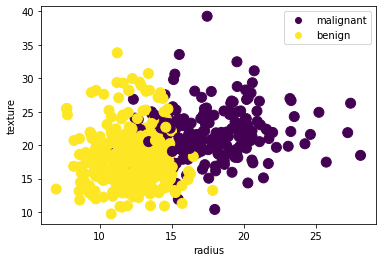

In [59]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
scatter=ax.scatter(X_data[:,0], X_data[:,1], c = y_data, marker = 'o', s=100)
ax.set_xlabel('radius')
ax.set_ylabel('texture')
ax.legend(handles=scatter.legend_elements()[0], labels=['malignant','benign'])

In [62]:
print(X_data.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 0.2)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print(f'Accuracy of Logistic regression classifier on training set: {logreg.score(X_train, y_train):.2f}')
print(f'Accuracy of Logistic regression classifier on test set: {logreg.score(X_test, y_test):.2f}')

(569, 2)
Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.85


(-5.0, 50.0)

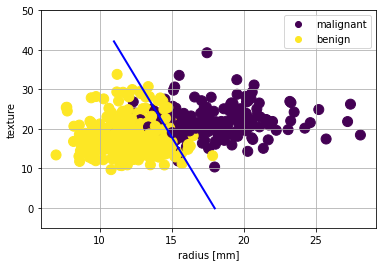

In [63]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
scatter=ax.scatter(X_data[:,0], X_data[:,1], c = y_data, marker = 'o', s=100)
ax.legend(handles=scatter.legend_elements()[0], labels=['malignant','benign'])
ax.set_xlabel('radius [mm]')
ax.set_ylabel('texture')

import numpy as np
# Retrieve the model parameters
theta0 = logreg.intercept_[0]
theta1, theta2 = logreg.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -theta0/theta2
m = -theta1/theta2
# Plot the data and the classification with the decision boundary.
xmin, xmax = 11, 18
#ymin, ymax = 20, 10
xd = np.linspace(xmin, xmax,10)
yd = m*xd + c
ax.plot(xd, yd, 'b', lw=2, ls='-')
ax.grid(True)
ax.set_ylim(-5,50)

Having found the boundary (hypothesis) between the two group of features (radius and texture) we can now predict if a tumor is malignant or benign for any of its size and texture

In [70]:
p_malignant, p_benign = logreg.predict_proba([[15,15]])[0]
print(p_malignant, p_benign)

0.36347762118132365 0.6365223788186763


## Let's look at the probability plot (notice we have two features, so its probably easier to plot P(z) vs z)
$$g(z)=\frac{1}{1+e^{-(z)}}$$
$$g(\theta^T X)=\frac{1}{1+e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2)}}$$
* arbitrary saying if a tumor is a benign (1) or malign (0)

Text(0, 0.5, 'P(z)')

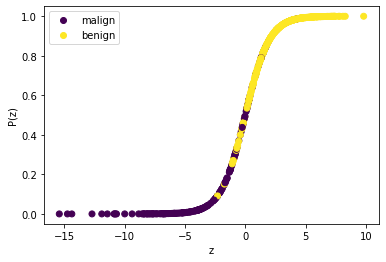

In [71]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
z=theta0 + theta1*X_data[:,0] + theta2*X_data[:,1]
scatter=ax.scatter(z,1/(1+np.exp(-z)),c = y_data)
ax.legend(handles=scatter.legend_elements()[0], labels=['malign','benign'])
ax.set_xlabel('z')
ax.set_ylabel('P(z)')

### notice looking at both plots:

* all points (yellow and dark) which lie close to the boundary line have probabilites around 50% for the tumor to be malignant or benign

* points that correspond to larger radius >25[mm] will have much higher probability for the tumor to be malignant

* points that correspond to smaller radius <10[mm] will have much higher probability for the tumor to be benign

### Of course we can do three, four or five... etc features (like in multivariate regression). 
* for example we can also do image classification using logistic regression
* the features are the pixels
* picture 8x8 pixels has 64 features

# Non-linear decision boundaries
* boundaries can be linear - straight line
* or nonlinear - circle or more complicated forms

Text(0.5, 0, 'x1')

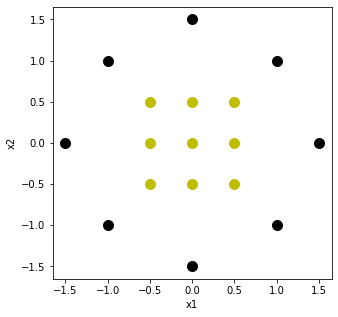

In [84]:
import matplotlib.pyplot as plt

os = np.array([[0,0], [0,0.5], [0.5,0.5], [0.5,0], [-0.5,0.5], [-0.5,0], [-0.5,-0.5], [0,-0.5], [0.5, -0.5],])
xs = np.array([[1,1], [-1,1], [1,-1], [-1,-1], [0,1.5], [-1.5,0], [0,-1.5], [1.5,0]])

fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(os[:,0], os[:,1], marker = 'o', s = 100, color = 'y')
ax.scatter(xs[:,0], xs[:,1], marker = 'o', s = 100, color = 'k')
ax.set_ylabel('x2')
ax.set_xlabel('x1')

As in the above example, the black circle points belong to the region y=1 and the red circles points belong to the region y=0. Let’s say our hypothesis looks like:

$h_{\theta}(x)=\theta_0+\theta_1 x_1 +\theta_2 x_2 +\theta_3 x_1^2 + \theta_4 x_2^2 $

Assume we end up choosing the values of parameters as:

$$\theta_0=-1$$
$$\theta_1=0$$
$$\theta_2=0$$
$$\theta_3=1$$
$$\theta_4=1$$

Then our parameter vector looks like:


the hypothesis will predict y=1 when:
$$1-x_1^2 + x_2^2 \geq 0$$
or
$$x_1^2 + x_2^2 \geq 1$$

We can see that the above equation corresponds to a circle of radius 1 centered at the origin.

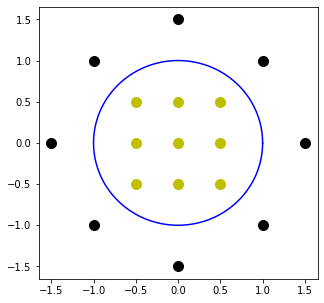

In [86]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
theta = np.linspace(0, 2*np.pi , 1000)
r = np.sqrt(1)
x = r*np.cos(theta)
y = r*np.sin(theta)
ax.plot(x,y, color = 'b')
ax.scatter(os[:,0], os[:,1], marker = 'o', s = 100, color = 'y')
ax.scatter(xs[:,0], xs[:,1], marker = 'o', s = 100, color = 'k')

The circle is our decision boundary (hypothesis?) and the region outside the circle corresponds to y=1 and inside the circle corresponds to y=0. 
The point lying exactly on the line will have probabitly 0.5 to belong to one or the other class.

We can see that the decision boundary doesn't necessarily have to be a straight line but also more complex shapes like a circle, ellipse, and any other irregular shapes. Again the decision boundary is a property of the hypothesis and its parameters and not that of the training dataset.

### more realistic non-linear decision boundary (example from internet) problem unidentified

<img src="imgs/nonlinear_boundary.png" width="500" />

# But how does it really work?

in all the examples we performed a fitting to find the parameters $\theta_0$, $\theta_1$... $\theta_n$

* and the output is the probability (values between 0 and 1)
$$g(\theta^T X)=\frac{1}{1+e^{-(\theta^T X)}}$$

* what is the cost function for logistic regression?
* how is it minimized?
* linear regression hypothesis $h_{\theta}(x)=\theta_0+\theta_1x$ - which is a straight line
* logistic regression hypothesis: $h_{\theta}(x)=g(\theta^T X) = \frac{1}{1+e^{-(\theta^T X)}}$ - more complicated function

How to choose parameters $\Theta$ with Logistic Regression? 

Cost function for the linear regression from the last class:

$$J(\theta_0,\theta_1,\theta_2,,\theta_3...) = \frac{1}{m} \sum_{i=1}^{m}[ h_{\theta}(x_i) - y_i]^2 $$

where $h_{\theta}(x)=\theta^T X$

What if we use the same definition as above to find the cost of the logistic regression:

$$J(\theta_0,\theta_1,\theta_2,,\theta_3...) = \frac{1}{m} \sum_{i=1}^{m}[ h_{\theta}(x_i) - y_i]^2 $$

must remember that now: $h_{\theta}(x)$ is more complicated.

$h_{\theta}(x)=g(\theta^T X) = \frac{1}{1+e^{-(\theta^T X)}}$

Unfortunately, we cannot use the Linear Regression Cost Function for the Logistic. Sigmoid is a nonlinear function, which will make the cost function not convex (which is the the case of linear regression) and will look like this. (if we plug $h_{\theta}(x)$ into the above equation and plot $J(\theta)$ then the plot will look like following on the Left Hand Side (LHS).

<img src="imgs/convex_nonconvex.png" width="500" /> 

This non-convex $J(\theta)$ is a function with many local minima. It’s not guaranteed that the Gradient descent will converge to the global minimum. What we want is a convex $J(\theta)$, which is a function that converges to the global minimum (on the very bottom). We want a cost function to have one minima, not many. So, we have to write the Cost Function in a way that guarantees a convex $J(\theta)$:

$$J(\theta_0,\theta_1,\theta_2,,\theta_3...) = \frac{1}{m} \sum_{i=1}^{m} Cost\left( h_{\theta}(x_i) - y_i\right) $$

\begin{equation}
  Cost\left( h_{\theta}(x),y\right)=\begin{cases}
    -log (h_{\theta}(x)) , & \text{if $y=1$}.\\
    -log (1- h_{\theta}(x)) , & \text{if $y=0$}.
  \end{cases}
\end{equation}

Lets plot the logarithms...

Text(0.5, 1.0, 'Cost of hx for y=0')

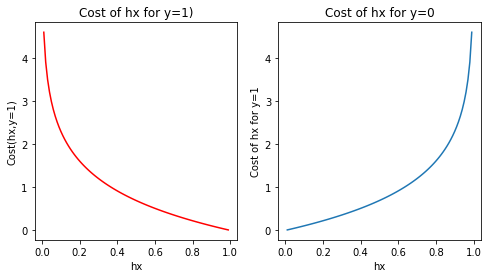

In [90]:
import numpy as np
hx=np.linspace(0,1,100)
hx=hx[1:-1]
cost_hx_y_1=-np.log(hx)
cost_hx_y_0=-np.log(1-hx)
import matplotlib.pyplot as plt
fix,ax=plt.subplots(1,2,figsize=(8,4))

ax[0].plot(hx,cost_hx_y_1,'-r')
ax[0].set_xlabel('hx')
ax[0].set_ylabel('Cost(hx,y=1)')
ax[0].set_title('Cost of hx for y=1)')

ax[1].plot(hx,cost_hx_y_0)
ax[1].set_xlabel('hx')
ax[1].set_ylabel('Cost of hx for y=1')
ax[1].set_title('Cost of hx for y=0')

Lets look at each plot separately for each case:

* if y=1 and $h_{\theta}(x)$ is close to zero then the cost fuction goes to $\infty$, and if y=1 and $h_{\theta}(x)$ is close to one then the cost fuction goes to $0$.

* if y=0 and $h_{\theta}(x)$ is close to one then the cost fuction goes to $\infty$, and if y=0 and $h_{\theta}(x)$ is close to zero then the cost fuction goes to $0$.

In other words:

* y=1 can be only if $h_{\theta}(x) \geq 0.5$ so if $h_{\theta}(x)$ is close to zero the algrithm will penalize the large cost!
* y=0 can be only if $h_{\theta}(x) < 0.5$ so if $h_{\theta}(x)$ is close to one the algrithm will penalize the large cost!

Hence we have one minimum for each case. Below the same plots as before but in colors for clarity.

<img src="imgs/cost_function1.png" width="700" />

Because we have two binary conditions for the Benign or Malignant outcome (y), the Cost Function concerning y is.

If y = 1, but we predict $h_{\theta}(x) = 0$, we will penalize the learning algorithm by a considerable cost (see the red curve in Figure) because, in this case, the cost will tend to infinite. Instead, if our prediction is $h_{\theta}(x) = 1$, (thus equal to y), then the cost is going to be 0.

In the case of y = 0, we have the opposite: if y = 0 and we predict $h_{\theta}(x) = 0$, the cost is going to be 0, because our Hypothesis matches with y, while if our prediction is $h_{\theta}(x) = 1$, we end up paying a very large cost.


One can write the cost function in one compressed way.
The simplified version of the Cost Function is the following:

\begin{equation}
  Cost\left( h_{\theta}(x),y\right)=\begin{cases}
    -log (h_{\theta}(x)) , & \text{if $y=1$}.\\
    -log (1- h_{\theta}(x)) , & \text{if $y=0$}.
  \end{cases}
\end{equation}

$$Cost\left( h_{\theta}(x),y\right)=-y log (h_{\theta}(x)) - (1-y)(log (1- h_{\theta}(x)))$$

if $y=1$

$$Cost\left( h_{\theta}(x),y\right)=-log (h_{\theta}(x))$$

if $y=0$

$$Cost\left( h_{\theta}(x),y\right)=-log (1 - h_{\theta}(x))$$

### Finally after putting everything together we get:

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} -y log (h_{\theta}(x)) - (1-y)(log (1- h_{\theta}(x))) $$

or 

$$J(\theta) = -\frac{1}{m} \left[\sum_{i=1}^{m} y log (h_{\theta}(x)) + (1-y)(log (1- h_{\theta}(x))) \right]$$

which for each sample:

$$J(\theta) = -\frac{1}{m} \left[\sum_{i=1}^{m} y^{(i)} log (h_{\theta}(x^{(i)})) + (1-y^{(i)})(log (1 - h_{\theta}(x^{(i)}))) \right]$$

* this can be derived from the principle of "maximum likelihood estimation"

* we want to find $\Theta$ that minimizes $J(\Theta)$

## Gradient descent

From the class on the gradient descent of the linear regression we remember that the update of each of the parameter $\theta_j$
we need to take the derivative of the $J(\theta)$:

$$\theta_j:=\theta_j - \alpha \frac{d}{d\theta_j}J(\theta_j)$$

It can be shown that the derivative of the cost function $J(\theta)$ for the logistic regression is:

$$\frac{d}{d\theta}J(\theta)= \frac{1}{m} \sum_{i=1}^{m}[ h_{\theta}(x_i) - y_i] (x_i)  $$

Hence actually the Gradient descent is identical to that used for the Linear Regression. The only difference is that the definition of $h_{\theta}(x)$ contains the sigmoid function.

$$\theta_0:=\theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}[ h_{\theta}(x_i) - y_i]$$
$$\theta_1:=\theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m}([ h_{\theta}(x_i) - y_i]*x_i)$$

where:
$h_{\theta}(x)= \frac{1}{1+e^{-(\theta^T X)}}$